In [1243]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1244]:
dataset = pd.read_excel('data.xlsx', sheet_name='data')

In [1245]:
dataset

,BITS ID,Campus,Program Applied to,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,...,Universities (Funded admit),Did you choose to work for a few months/years before applying to graduate school?,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Was the above PS2/Thesis experience relevant to your application profile?,Internship other than PS1/PS2,Did you join any other classes/consultancy for your application process ?,Journal / Conference ( if your paper was published )
0,2015A7TS0081P,Pilani,MS,Computer Science,Artificial Intelligence/ Machine Learning,7.93,Arizona State University,154,170,4,...,NO,Yes,1.50,NaN,Singapore University of Tech and Design,Reinforcement Learning for path planning. Was ...,NO,Yes,NO,MDPI Applied Sciences
1,2012C6PSC6598P,Pilani,MS,Computer Science,NaN,6.7,Arizona State University,159,167,3.5,...,NO,Yes,1.50,CSIR- National Aerospace Laboratories,PS 2,Worked at Khosla labs,Yes,NO,NO,NO
2,2014A3PS224P,Pilani,MS,Mechanical Engineering,Robotics,7.78,Arizona State University,154,169,3.5,...,NO,NO,0.00,NaN,Infinera,Hardware Testing,NO,NO,NO,NaN
3,2015A3PS0270P,Pilani,MS,Computer Science,NaN,7.98,Arizona State University,148,169,4,...,NO,NO,0.50,NaN,NaN,NaN,Yes,NO,NO,NaN
4,2012B1A4761P,Pilani,PhD,BioEngineering,Tissue Engineering,8.4,Boston University,163,164,5,...,YES,Yes,1.50,NaN,Thesis - Harvard Medical School,"Design and development of cell phone enabled, ...",Yes,Yes,NO,"5 publications - ACS NaNO, Nature Communicatio..."
5,2012B1A4786P,Pilani,MS+PhD,Bioengineering,NaN,7.46,Boston University,155,163,4,...,NO,Yes,2.00,"CHAMBAL FERTILISERS AND CHEMICALS LIMITED, KOTA","Brigham and Women's Hospital, Harvard Medical ...",Developed and fabricated microfluidic models f...,Yes,NOne,NO,2 Indian patent applications in process
6,2011A7TS074P,Pilani,PhD,Computer Science,Artificial Intelligence/ Machine Learning,8.54,Carnegie Mellon,170,169,5,...,YES,NO,0.50,NaN,NaN,NaN,NaN,NaN,Yes,NaN
7,2015A2TS0550H,Hyderabad,MS,Civil Engineering,Transportation Engineering,9.03,Carnegie Mellon University,151,169,2.5,...,YES,NO,0.00,NaN,On campus thesis,NaN,Yes,Yes,Yes,NaN
8,2007B2A4655G,Goa,MS,Other,Public Policy,6.31,Carnegie Mellon University,165,167,4.5,...,YES,Yes,2.00,Mphasis Ltd.\nTook 2 Recommendations from Work...,NaN,NaN,NO,NO,NO,NaN
9,2012A3PS259H,Hyderabad,MS,Mechanical Engineering,Robotics,8.46,Carnegie Mellon University,151,167,3,...,NO,NO,0.00,NaN,"Tonbo Imaging, Bangalore",NaN,Yes,NO,NO,NOne


Shuffling dataframe to not be dependent on time based factors

In [1246]:
#dataset.sample(frac=1).reset_index(drop=True, inplace=True)

In [1247]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 23 columns):
BITS ID                                                                              1452 non-null object
Campus                                                                               1450 non-null object
Program Applied to                                                                   1450 non-null object
Target Discipline                                                                    1400 non-null object
Sub-Discipline                                                                       1011 non-null object
CGPA                                                                                 1450 non-null object
University Selected                                                                  951 non-null object
GRE Score : Verbal                                                                   1362 non-null object
GRE Score : Quant                             

Renaming few columns 

In [1248]:
dataset.columns = (['BITS ID', 'Campus', 'Program Applied', 'Target Discipline',
       'Sub-Discipline', 'CGPA', 'University Selected', 'GRE Score : Verbal',
       'GRE Score : Quant', 'GRE Score : AWA', 'TOEFL Score',
       'Universities Applied', 'Universities Admit',
       'Universities (Funded admit)',
       'Work experience',
       'Duration of work experience', 'Work Experience details',
       'PS2/Thesis Organization', 'PS2/Thesis Details',
       'Relevance of PS2/Thesis to program',
       'Internship other than PS1/PS2',
       'Consultancy/Classes',
       'Conference publication'])

In [1249]:
dataset.isnull().sum()

BITS ID                                  3
Campus                                   5
Program Applied                          5
Target Discipline                       55
Sub-Discipline                         444
CGPA                                     5
University Selected                    504
GRE Score : Verbal                      93
GRE Score : Quant                      429
GRE Score : AWA                        445
TOEFL Score                            107
Universities Applied                     5
Universities Admit                     323
Universities (Funded admit)            179
Work experience                        247
Duration of work experience            256
Work Experience details                902
PS2/Thesis Organization                355
PS2/Thesis Details                     914
Relevance of PS2/Thesis to program     426
Internship other than PS1/PS2          908
Consultancy/Classes                    572
Conference publication                1246
dtype: int6

In [1250]:
dataset[dataset['BITS ID'].isnull()]

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,...,Universities (Funded admit),Work experience,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication
1155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1251]:
dataset[dataset['CGPA'].isnull()]

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,...,Universities (Funded admit),Work experience,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication
1154,Batch 2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1306,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


All values are NANs for missing ID values, implying empty rows 

In [1252]:
dataset.dropna(subset=['BITS ID','CGPA'], inplace=True)

Dealt with missing values in crucial field that werent supposed to be missing 

In [1253]:
dataset.isnull().mean()*100

BITS ID                                0.000000
Campus                                 0.000000
Program Applied                        0.000000
Target Discipline                      3.448276
Sub-Discipline                        30.275862
CGPA                                   0.000000
University Selected                   34.413793
GRE Score : Verbal                     6.068966
GRE Score : Quant                     29.241379
GRE Score : AWA                       30.344828
TOEFL Score                            7.034483
Universities Applied                   0.000000
Universities Admit                    21.931034
Universities (Funded admit)           12.000000
Work experience                       16.689655
Duration of work experience           17.310345
Work Experience details               61.862069
PS2/Thesis Organization               24.137931
PS2/Thesis Details                    62.689655
Relevance of PS2/Thesis to program    29.034483
Internship other than PS1/PS2         62

Dealing with target discipline column

In [1254]:
a = dataset[dataset['Target Discipline'].isnull()]
a

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,...,Universities (Funded admit),Work experience,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication
118,2015ABTS0796H,Hyderabad,MS,NaN,NaN,8.1,Pennsylvania State University,155,167,3.5,...,NO,NO,0.5,NaN,IIM Bangalore,SupplyChain Management,Yes,Yes,NaN,Production and Operations Management Society
513,2011ABPS521P,Pilani,MS,NaN,NaN,7.4,NOrthwestern University,161,169,3.5,...,NO,NO,0.0,NaN,NaN,NaN,NO,IIT Bombay,NO,NaN
1077,2007A7PS044P,Pilani,PhD,NaN,Systems and Networking,9.49,NaN,1460,NaN,NaN,...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1078,2008A1PS500G,Goa,MS,NaN,Aerospace Engineering,7.37,NaN,1450,NaN,NaN,...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1080,2006B5A3657,Pilani,MS,NaN,"DSP, Digital Systems Design",8,NaN,157,164,NaN,...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1081,2006a4ps313p,Pilani,MS,NaN,Industrial engineering,9.53,NaN,1430,NaN,NaN,...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1082,2006c6ps249p,Pilani,MS,NaN,Artificial Intelligence/ Machine Learning,9.26,NaN,1460,NaN,NaN,...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1084,2006A8PS280,Pilani,MS,NaN,Digital IC Design,8.94,NaN,1360,NaN,NaN,...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1088,2007A7PS132,Pilani,PhD,NaN,Theoretical Science,9.35,NaN,1360,NaN,NaN,...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1090,2006A3PS172,Pilani,MS,NaN,Analog and Mixed Signal,9.07,NaN,1390,NaN,NaN,...,NO,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As subdiscipline values are not null for target discipline being null, we dont have to drop these rows. 

In [1255]:
dataset['Target Discipline'].unique()

array(['Computer Science', 'Mechanical Engineering', 'BioEngineering',
       'Bioengineering', 'Civil Engineering', 'Other',
       'Environmental Engineering',
       'Electrical and Electronics Engineering', 'Engineering Management',
       'Chemical Engineering', 'EcoNOmics', 'Physics',
       'Mathematics/Statistics', 'Biological Sciences', 'Finance', nan,
       'Computational Science', 'Business Analytics', ' Bioengineering',
       'Pharmaceutical Sciences', 'Chemistry', 'Computer Science ',
       'Zoology', 'Management', 'Civil Engineering ', 'computer science',
       ' Electrical and Electronics Engineering ', ' Finance',
       'Engineering Technology', 'Biology ', 'Biology',
       'Aerospace Engineering', ' Electrical and Electronics Engineering',
       'Biological sciences'], dtype=object)

There are multiple duplicate categories to be dealt with. Eg. 'Computer science', 'computer science' are the same categories.

In [1256]:
dataset[dataset.loc[:,'Target Discipline'] == 'computer science'].loc[:,'Target Discipline'] = 'Computer Science'
dataset[dataset.loc[:,'Target Discipline'] == 'Computer Science '].loc[:,'Target Discipline'] = 'Computer Science'
dataset[dataset.loc[:,'Target Discipline'] == 'Computational Science'].loc[:,'Target Discipline'] = 'Computer Science'
dataset[dataset.loc[:,'Target Discipline'] == 'Civil Engineering '].loc[:,'Target Discipline'] = 'Civil Engineering'
dataset[dataset.loc[:,'Target Discipline'] == ' Electrical and Electronics Engineering'].loc[:,'Target Discipline'] = 'Electrical and Electronics Engineering'
dataset[dataset.loc[:,'Target Discipline'] == ' Electrical and Electronics Engineering '].loc[:,'Target Discipline'] = 'Electrical and Electronics Engineering'
dataset[dataset.loc[:,'Target Discipline'] == 'Biology '].loc[:,'Target Discipline'] = 'Biology'
dataset[dataset.loc[:,'Target Discipline'] == 'Biological sciences'].loc[:,'Target Discipline'] = 'Biology'
dataset[dataset.loc[:,'Target Discipline'] == 'Biological Sciences'].loc[:,'Target Discipline'] = 'Biology'
dataset[dataset.loc[:,'Target Discipline'] == 'Zoology'].loc[:,'Target Discipline'] = 'Biology'
dataset[dataset.loc[:,'Target Discipline'] == ' Bioengineering'].loc[:,'Target Discipline'] = 'Bioengineering'
dataset[dataset.loc[:,'Target Discipline'] == 'BioEngineering'].loc[:,'Target Discipline'] = 'Bioengineering'
dataset[dataset.loc[:,'Target Discipline'] == 'EcoNOmics'].loc[:,'Target Discipline'] = 'Economics'
dataset[dataset.loc[:,'Target Discipline'] == ' Finance'].loc[:,'Target Discipline'] = 'Finance'










In [1257]:
dataset['Work experience'].value_counts()

Yes    660
NO     416
no      89
yes     43
Name: Work experience, dtype: int64

In [1258]:
dataset['Target Discipline'].value_counts()

Computer Science                            511
Electrical and Electronics Engineering      343
Mechanical Engineering                      217
Chemical Engineering                         60
Civil Engineering                            41
Physics                                      21
Pharmaceutical Sciences                      21
Mathematics/Statistics                       21
Bioengineering                               20
Biological Sciences                          19
Other                                        19
Civil Engineering                            18
Finance                                      17
Business Analytics                           17
Environmental Engineering                    12
Engineering Management                        6
Management                                    5
EcoNOmics                                     5
Computer Science                              5
computer science                              3
Biology                                 

Merging related fields like Economics and Finance, Aerospace and mechanical. This step is performed to create a more balanced dataset

In [1259]:
dataset[dataset.loc[:,'Target Discipline'] == 'Economics'] = 'Finance'
dataset[dataset.loc[:,'Target Discipline'] == 'Engineering Management'] = 'Management'
dataset[dataset.loc[:,'Target Discipline'] == 'Aerospace Engineering'] = 'Mechanical Engineering'

Dealing with 'other' category 

In [1260]:
dataset[dataset['Target Discipline'] == 'Other']['Sub-Discipline'].value_counts().index

Index(['Media Arts and Sciences', 'Computational Sciences', 'UX Research',
       'Public Policy ', 'Music techNOlogy', 'Public Policy'],
      dtype='object')

Accomodating them in current categories for Target variables if possible to prevent them acting as outliers

In [1287]:
l = dataset[(dataset.loc[:,'Target Discipline'] == 'Other') & (dataset.loc[:,'Sub-Discipline']=='Public Policy')].loc[:,'Target Discipline'].index 
dataset.at[l,'Target Discipline'] = 'Finance'
l = dataset[(dataset.loc[:,'Target Discipline'] == 'Other') & (dataset.loc[:,'Sub-Discipline']=='Public Policy ')].loc[:,'Target Discipline'].index
dataset.at[l,'Target Discipline'] = 'Finance'
l = dataset[(dataset.loc[:,'Target Discipline'] == 'Other') & (dataset.loc[:,'Sub-Discipline']=='Computational Sciences')].loc[:,'Target Discipline'].index
dataset.at[l,'Target Discipline'] = 'Computer Science'
l = dataset[(dataset.loc[:,'Target Discipline'] == 'Other') & (dataset.loc[:,'Sub-Discipline']=='UX Research')].loc[:,'Target Discipline'].index
dataset.at[l,'Target Discipline'] = 'Computer Science'
l = dataset[(dataset.loc[:,'Target Discipline'] == 'Other') & (dataset.loc[:,'Sub-Discipline']=='Music techNOlogy')].loc[:,'Target Discipline'].index 
dataset.at[l,'Target Discipline']= 'Electrical and Electronics Engineering'

In [1288]:
dataset[dataset.loc[:,'Target Discipline'] == 'Other']['Sub-Discipline']

36                         NaN
87     Media Arts and Sciences
559                        NaN
562                        NaN
563                        NaN
565                        NaN
573                        NaN
579                        NaN
607                        NaN
609                        NaN
610                        NaN
619                        NaN
636                        NaN
764                        NaN
Name: Sub-Discipline, dtype: object

We can Imputing Target disicipline from ID number if subdiscipline is Nan

Imputing Nan value in Target disiciple from Sub-Discipline

In [1263]:
dataset[dataset['Target Discipline'].isnull()]

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,...,Universities (Funded admit),Work experience,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication
118,2015ABTS0796H,Hyderabad,MS,NaN,NaN,8.1,Pennsylvania State University,155,167,3.5,...,NO,NO,0.5,NaN,IIM Bangalore,SupplyChain Management,Yes,Yes,NaN,Production and Operations Management Society
513,2011ABPS521P,Pilani,MS,NaN,NaN,7.4,NOrthwestern University,161,169,3.5,...,NO,NO,0,NaN,NaN,NaN,NO,IIT Bombay,NO,NaN
1077,2007A7PS044P,Pilani,PhD,NaN,Systems and Networking,9.49,NaN,1460,NaN,NaN,...,NO,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1078,2008A1PS500G,Goa,MS,NaN,Aerospace Engineering,7.37,NaN,1450,NaN,NaN,...,NO,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1080,2006B5A3657,Pilani,MS,NaN,"DSP, Digital Systems Design",8,NaN,157,164,NaN,...,NO,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1081,2006a4ps313p,Pilani,MS,NaN,Industrial engineering,9.53,NaN,1430,NaN,NaN,...,NO,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1082,2006c6ps249p,Pilani,MS,NaN,Artificial Intelligence/ Machine Learning,9.26,NaN,1460,NaN,NaN,...,NO,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1084,2006A8PS280,Pilani,MS,NaN,Digital IC Design,8.94,NaN,1360,NaN,NaN,...,NO,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1088,2007A7PS132,Pilani,PhD,NaN,Theoretical Science,9.35,NaN,1360,NaN,NaN,...,NO,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1090,2006A3PS172,Pilani,MS,NaN,Analog and Mixed Signal,9.07,NaN,1390,NaN,NaN,...,NO,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1264]:
dataset[dataset.loc[:,'Target Discipline'].isnull()]['Sub-Discipline'].value_counts().index

Index(['VLSI', 'Construction Engineering and Management',
       'Artificial Intelligence/ Machine Learning', 'Systems and Networking',
       'Distributed Systems', 'Cognitive Neuroscience', 'DataScience',
       'Industrial engineering', 'Database Systems',
       'Structural Health Monitoring and Structural Control',
       'Communications&Signal Processing', 'Network Security', 'Neuroscience',
       'Land use and transportation planning', 'Sustainable Systems',
       'DSA and Networks', 'Theoretical Science', 'Analog and Mixed Signal ',
       'Reversible logic, quantum computing, Communication Engineering',
       'Developmental Biology', 'Information Systems Management',
       'Management Science and Engineering', 'Fracture Mechanics',
       'mechanical', 'Management Information Systems', 'Aerospace Engineering',
       'Automobile ', 'MIS', 'Power Electronics',
       'Mechanical-Design and Manufacturing', 'Finance',
       'Information Security', 'Materials and minerals; Pr

dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Construction Engineering and Management')].loc[:,'Target Discipline']= dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Construction Engineering and Management')].fillna({'Target Discipline' : 'Civil Engineering'})
dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Land use and transportation planning')].loc[:,'Target Discipline'] = dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Land use and transportation planning')].fillna({'Target Discipline' : 'Civil Engineering'})
dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Developmental Biology')].loc[:,'Target Discipline']= dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Developmental Biology')].fillna({'Target Discipline' : 'Biology'})
dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Materials and minerals; Process simulations')].loc[:,'Target Discipline']= dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Materials and minerals; Process simulations')].fillna({'Target Discipline' : 'Chemical Engineering'})
dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'environmental engineering')].loc[:,'Target Discipline']= dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'environmental engineering')].fillna({'Target Discipline' : 'Environmental Engineering'})
dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Finance')].loc[:,'Target Discipline']= dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Finance')].fillna({'Target Discipline' : 'Environmental Engineering'})


In [1265]:
#dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Construction Engineering and Management')]= dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Construction Engineering and Management')].fillna('Civil Engineering', inplace= True)
#dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'Construction Engineering and Management')]


Removing Garbage values , with Nan in all columns

In [1266]:
dataset.drop(index= [560,1091,1103,1112,1117,1130],inplace= True, axis=0)

b = dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'DataScience')]
dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'DataScience')] = b.fillna({'Target Discipline': 'Computer Science'})

#dataset = dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'mechanical')].loc[:,'Target Discipline'].fillna('Mechanical Engineering')
#dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'mechanical')].loc[:,'Target Discipline']
#dataset[(dataset.loc[:,'Target Discipline'].isnull()) & (dataset.loc[:,'Sub-Discipline'] == 'mechanical')]

Defining functions for target disicipline with lots of subdisciplines

In [1267]:
def mechanical(subdiscipline):
    l = dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == subdiscipline)].index
    dataset.loc[l,'Target Discipline'] = 'Mechanical Engineering'

In [1268]:
def computers(subdiscipline):
    l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == subdiscipline)].index
    dataset.loc[l,'Target Discipline'] = 'Computer Science'

In [1269]:
def electronics(subdiscipline):
    l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == subdiscipline)].index
    dataset.at[l,'Target Discipline'] = 'Electrical and Electronics Engineering'

In [1270]:
def biology(subdiscipline):
    l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == subdiscipline)].index
    dataset.at[l,'Target Discipline'] = 'Biology'

In [1271]:
def civil(subdiscipline):
    l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == subdiscipline)].index
    dataset.at[l,'Target Discipline'] = 'Civil Engineering'

Defining lists for different subdisciplines related to a target discipline

In [1272]:
lis_mech = ['Automobile ', 'Mechanical-Design and Manufacturing','Fracture Mechanics', 'Aerospace Engineering', 'Sustainable Systems', 'Industrial engineering','Design Engineering'  ]
lis_comp= ['MIS','Systems and Networking','Storage Area Networks','Management Information Systems', 'DataScience','Artificial Intelligence/ Machine Learning','Distributed Systems','Networks and Distributed Systems','Information Systems Management','DSA and Networks','Network Security','Database Systems','Information Security']
lis_elec = ['Audio Engineering/Music TechNOlogy','RF IC','Analog and Mixed Signal ','Analog and Mixed Signal','VLSI','Mobile Communications','Communications&Signal Processing','Analog and Mixed Signal','DSP, Digital Systems Design','Power Electronics', 'Digital IC Design','Reversible logic, quantum computing, Communication Engineering','Design']
lis_bio = ['Developmental Biology','Neuroscience']
lis_civil = ['Construction Engineering and Management','Land use and transportation planning']

In [1273]:
for i in lis_mech: 
    mechanical(i)
for i in lis_comp:
    computers(i)
for i in lis_elec:
    electronics(i)
for i in lis_bio:
    biology(i)
for i in lis_civil:
    civil(i)

In [1274]:
l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == 'environmental engineering')].index
dataset.at[l,'Target Discipline'] = 'Environmental Engineering'


In [1275]:
l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == 'Theoretical Science')].index
dataset.at[l,'Target Discipline'] = 'Physics'

In [1276]:
l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == 'Finance')].index
dataset.at[l,'Target Discipline'] = 'Finance'

In [1277]:
l= dataset[(dataset.loc[:,'Target Discipline'].isna()) & (dataset.loc[:,'Sub-Discipline'] == 'Materials and minerals; Process simulations')].index
dataset.at[l,'Target Discipline'] = 'Chemical Engineering'

In [1278]:
dataset[dataset['Target Discipline'].isna()]

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,...,Universities (Funded admit),Work experience,Duration of work experience,Work Experience details,PS2/Thesis Organization,PS2/Thesis Details,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication
118,2015ABTS0796H,Hyderabad,MS,NaN,NaN,8.1,Pennsylvania State University,155,167,3.5,...,NO,NO,0.5,NaN,IIM Bangalore,SupplyChain Management,Yes,Yes,NaN,Production and Operations Management Society
513,2011ABPS521P,Pilani,MS,NaN,NaN,7.4,NOrthwestern University,161,169,3.5,...,NO,NO,0,NaN,NaN,NaN,NO,IIT Bombay,NO,NaN


As both subdiscipline and target discipline fields are null, we should impute values from ID number
AB in ID stands for Manufacturing Engineering and can be clubbed with Mechanical

In [1279]:
l = dataset[dataset['Target Discipline'].isna()].index
dataset.at[l,'Target Discipline'] = 'Mechanical Engineering'

Dealing with other categorical columns

"Work Experience"

In [1280]:
dataset['Work experience'].unique()

array(['Yes', 'NO', 'Management', 'Mechanical Engineering', nan, 'yes',
       'no'], dtype=object)

In [1281]:
l = dataset[dataset.loc[:,'Work experience']== 'yes'].loc[:,'Work experience'].index
dataset.at[l,'Work experience'] = 'Yes'
l = dataset[dataset.loc[:,'Work experience']== 'no'].loc[:,'Work experience'].index
dataset.at[l,'Work experience'] = 'NO'

Imputing missing values in this column as No

In [1282]:
dataset['Work experience'].fillna('NO', inplace= True)    

In [1283]:
dataset['Universities Admit'

SyntaxError: unexpected EOF while parsing (<ipython-input-1283-08aff8e8d531>, line 1)

In [ ]:
#lis = dataset[dataset.loc[:,'BITS ID'].str.contains("A7") & dataset.loc[:,'Target Discipline'].isnull()].loc[:,'Target Discipline'].index
#dataset.at[lis,'Target Discipline'] = 'Computer Science'


In [ ]:
#lis_1 = dataset[dataset.loc[:,'BITS ID'].str.contains("A3") & dataset.loc[:,'Target Discipline'].isnull()].loc[:,'Target Discipline'].index
#dataset.at[lis_1,'Target Discipline'] = 'Electrical and Electronics Engineering'

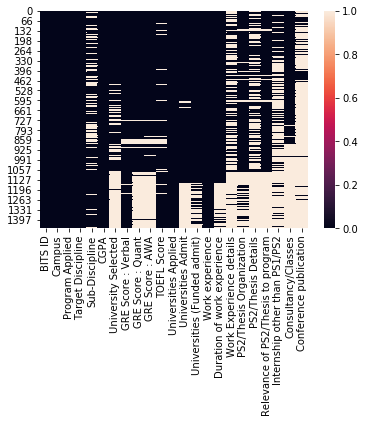

In [1291]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(dataset.isnull())